# Importing Libraries

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import statsmodels.api as sms
from sklearn.preprocessing import MinMaxScaler
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.arima_model import ARIMA

# Reading Data

In [2]:
data = pd.read_csv("Amazon.csv")

# Data Preprocessing

In [3]:
data

,Date,High,Low,Open,Close,Volume,Adj Close
0,1997-12-31,5.041667,4.843750,4.875000,5.020833,4446000.0,5.020833
1,1998-01-02,5.000000,4.796875,5.000000,4.958333,1660800.0,4.958333
2,1998-01-05,4.937500,4.708333,4.885417,4.750000,3590400.0,4.750000
3,1998-01-06,4.875000,4.666667,4.697917,4.838542,4174800.0,4.838542
4,1998-01-07,4.833333,4.692708,4.833333,4.781250,2725200.0,4.781250
...,...,...,...,...,...,...,...
6094,2022-03-21,3261.679932,3191.060059,3222.419922,3229.830078,3326900.0,3229.830078
6095,2022-03-22,3323.340088,3233.979980,3236.110107,3297.780029,3204300.0,3297.780029
6096,2022-03-23,3327.399902,3253.739990,3274.100098,3268.159912,2790600.0,3268.159912
6097,2022-03-24,3282.370117,3201.000000,3274.989990,3272.989990,2834900.0,3272.989990


In [4]:
df = data.copy()

In [5]:
df.dtypes

Date          object
High         float64
Low          float64
Open         float64
Close        float64
Volume       float64
Adj Close    float64
dtype: object

As data is in Object type we are going to convert into date time data types.

In [6]:
df['Date'] = pd.to_datetime(df['Date'])

In [7]:
df.set_index(['Date'],inplace=True)

# Ploting Data


<AxesSubplot:xlabel='Date'>

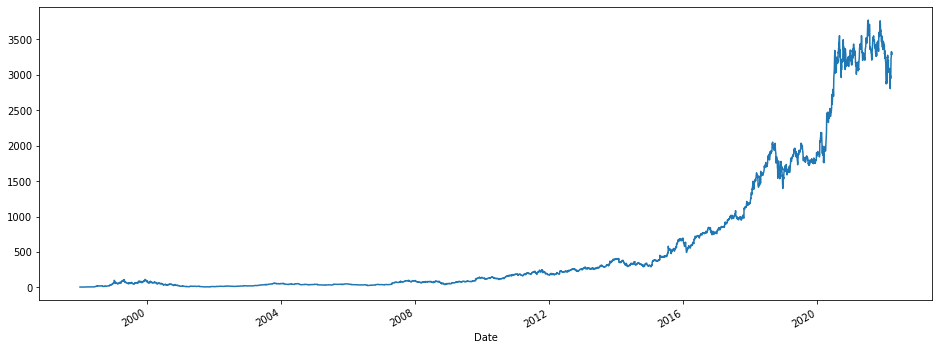

In [8]:
df['High'].plot(figsize = (16,6))

In [9]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-03-21,3261.679932,3191.060059,3222.419922,3229.830078,3326900.0,3229.830078
2022-03-22,3323.340088,3233.979980,3236.110107,3297.780029,3204300.0,3297.780029
2022-03-23,3327.399902,3253.739990,3274.100098,3268.159912,2790600.0,3268.159912
2022-03-24,3282.370117,3201.000000,3274.989990,3272.989990,2834900.0,3272.989990
2022-03-25,3307.370117,3247.489990,3280.000000,3282.010010,1584383.0,3282.010010


<AxesSubplot:xlabel='Date'>

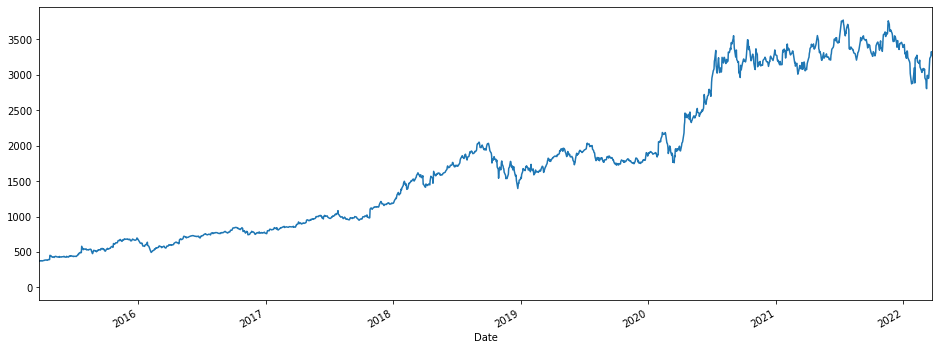

In [10]:
df['High'].plot(figsize = (16,6),xlim=(['2015-03-25','2022-03-25']))

<AxesSubplot:xlabel='Date'>

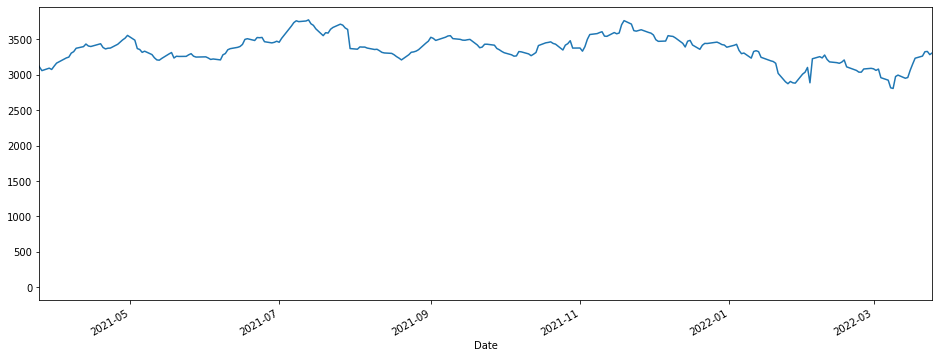

In [11]:
df['High'].plot(figsize = (16,6),xlim=(['2021-03-25','2022-03-25']))

<AxesSubplot:xlabel='Date'>

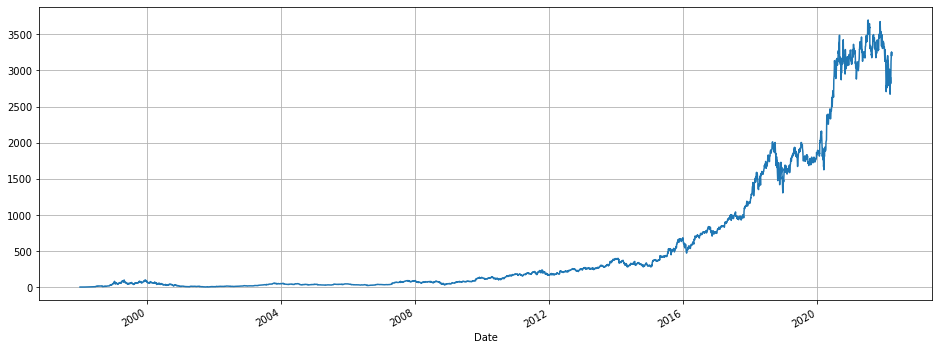

In [128]:
df['Low'].plot(figsize = (16,6),grid= True)

<AxesSubplot:xlabel='Date'>

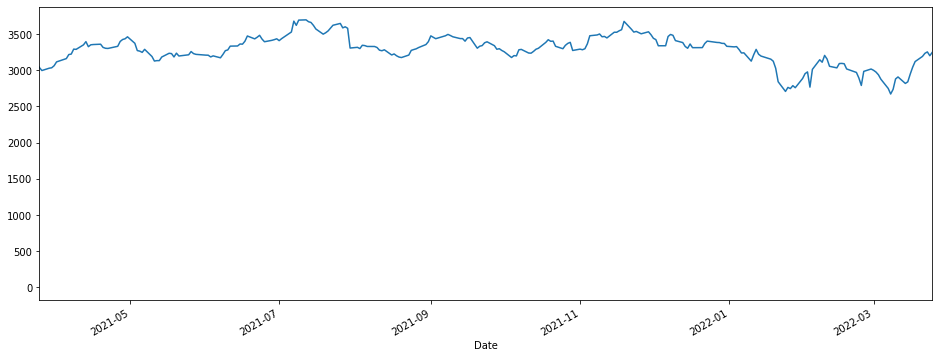

In [13]:
df['Low'].plot(figsize = (16,6),xlim=(['2021-03-25','2022-03-25']))

<AxesSubplot:xlabel='Date'>

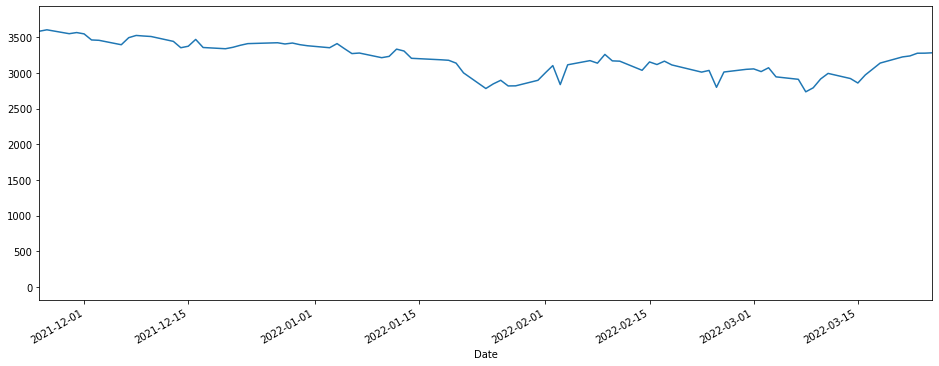

In [14]:
df['Open'].plot(figsize = (16,6),xlim=(['2021-11-25','2022-03-25']))

<AxesSubplot:xlabel='Date'>

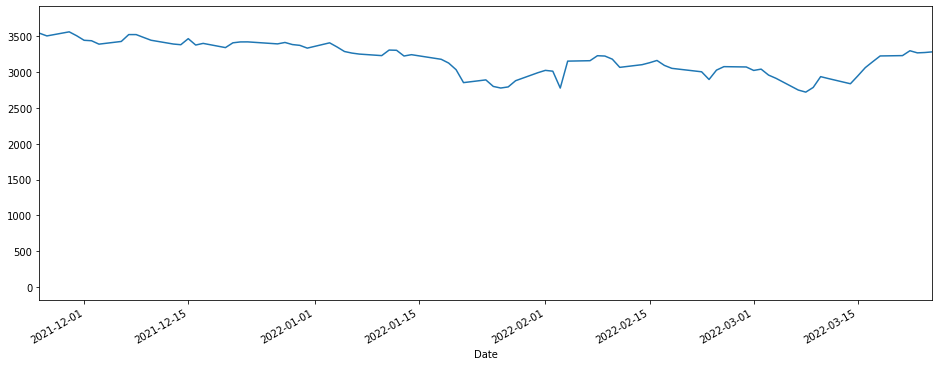

In [15]:
df['Close'].plot(figsize = (16,6),xlim=(['2021-11-25','2022-03-25']))

In [16]:
df['Open']['2021-11-26']

3602.10009765625

In [17]:
sh_open = df.loc['2021-03-25':'2022-03-25']['Open']

In [18]:
sh_open

Date
2021-03-25    3072.989990
2021-03-26    3044.060059
2021-03-29    3055.439941
2021-03-30    3070.010010
2021-03-31    3064.060059
                 ...     
2022-03-21    3222.419922
2022-03-22    3236.110107
2022-03-23    3274.100098
2022-03-24    3274.989990
2022-03-25    3280.000000
Name: Open, Length: 254, dtype: float64

<AxesSubplot:xlabel='Date'>

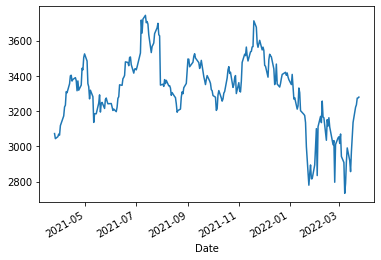

In [19]:
sh_open.plot()

<AxesSubplot:xlabel='Date'>

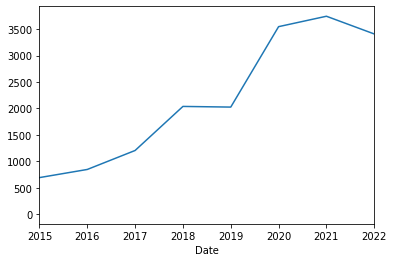

In [20]:
# Year of frequency
df.resample(rule='A').max()['Open'].plot(xlim=['2015-01-01','2022-03-25'])

<AxesSubplot:xlabel='Date'>

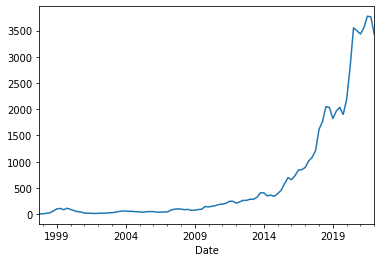

In [21]:

df.resample(rule='QS').max()['High'].plot()

# Appling Rolling Ave

In [22]:
df["Open 30 days"] = df['Open'].rolling(30).mean()

In [23]:
df["Open 10 days"] = df['Open'].rolling(10).mean()
df["Open 20 days"] = df['Open'].rolling(20).mean()

<AxesSubplot:xlabel='Date'>

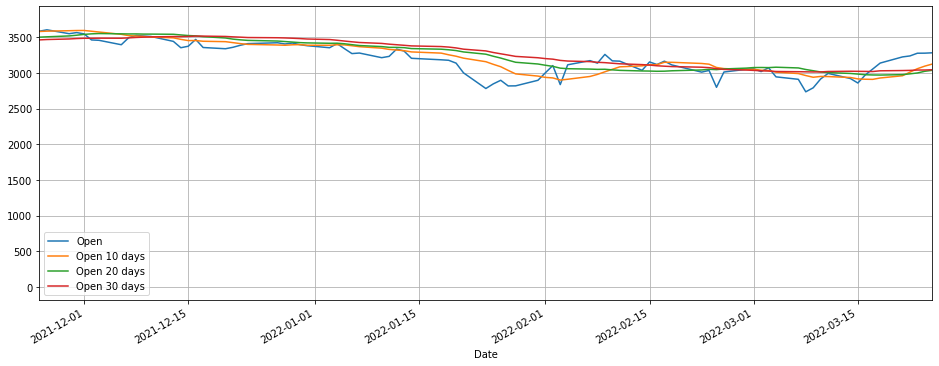

In [129]:
df[["Open","Open 10 days","Open 20 days","Open 30 days"]].plot(figsize = (16,6),xlim=(['2021-11-25','2022-03-25']),grid= True)

# Moving Ave

In [25]:
df['Mov 1.0'] = df['Open'].ewm(alpha=0.1,adjust=False).mean()

In [26]:
df['Mov 3.0'] = df['Open'].ewm(alpha=0.3,adjust=False).mean()

In [27]:
df['Span 5.0'] = df['Open'].ewm(span=5,adjust=False).mean()

<AxesSubplot:xlabel='Date'>

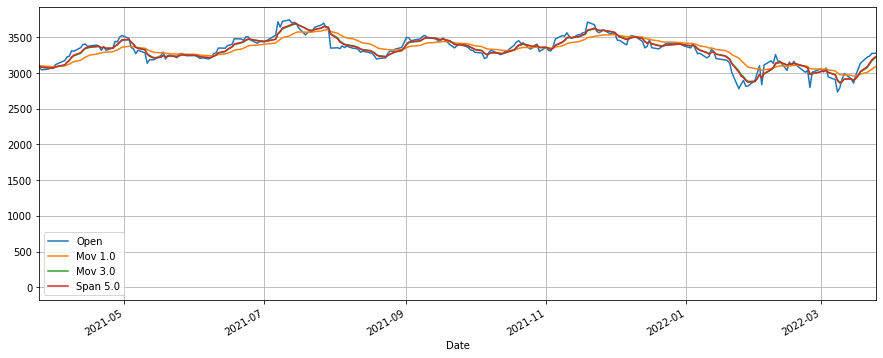

In [127]:
df[["Open",'Mov 1.0','Mov 3.0','Span 5.0']].plot(xlim=['2021-03-25','2022-03-25'],figsize=(15,6),grid = True)


<AxesSubplot:xlabel='Date'>

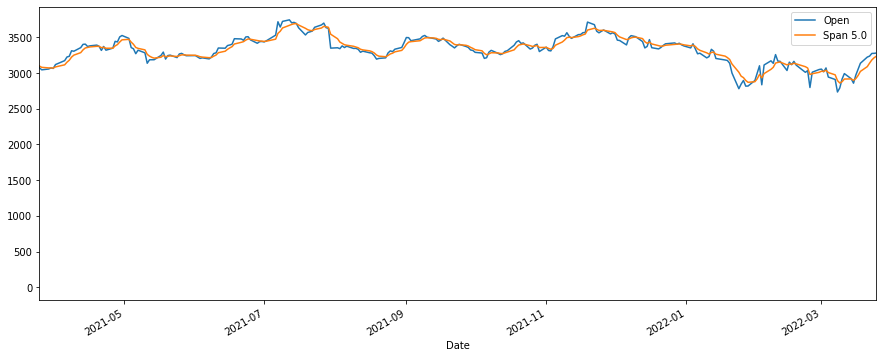

In [29]:
df[["Open",'Span 5.0']].plot(xlim=['2021-03-25','2022-03-25'],figsize=(15,6))

# Create our dataset

In [30]:
df_am = df[['Open']]

In [31]:
df_am

,Open
Date,
1997-12-31,4.875000
1998-01-02,5.000000
1998-01-05,4.885417
1998-01-06,4.697917
1998-01-07,4.833333
...,...
2022-03-21,3222.419922
2022-03-22,3236.110107
2022-03-23,3274.100098


<AxesSubplot:xlabel='Date'>

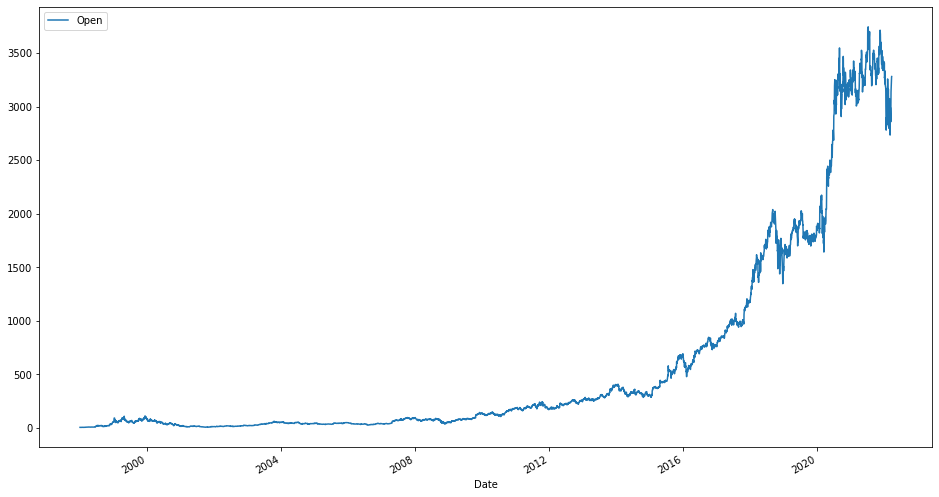

In [32]:
df_am.plot(figsize=(16,9))

In [33]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df_am.Open.dropna())
print(f"ADF Statistics: {result[0]}")
print(f"P value: {result[1]}")

ADF Statistics: 2.2659332787343596
P value: 0.9989325133553605


<AxesSubplot:xlabel='Date'>

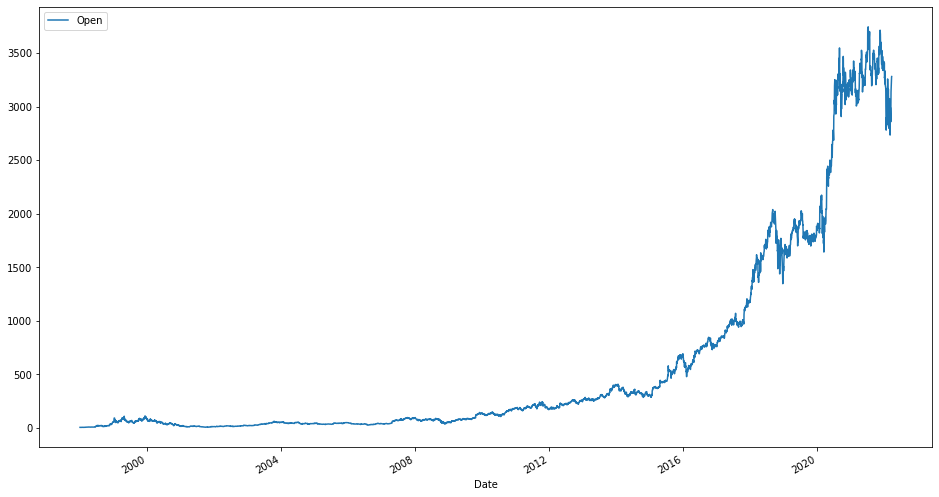

In [34]:
df_am.dropna().plot(figsize= (16,9))

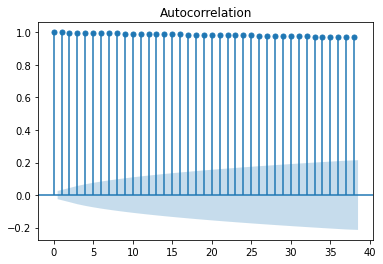

In [35]:
acf = plot_acf(df_am['Open'].dropna())

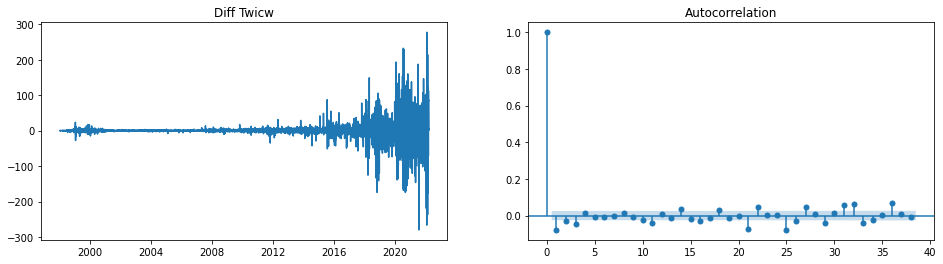

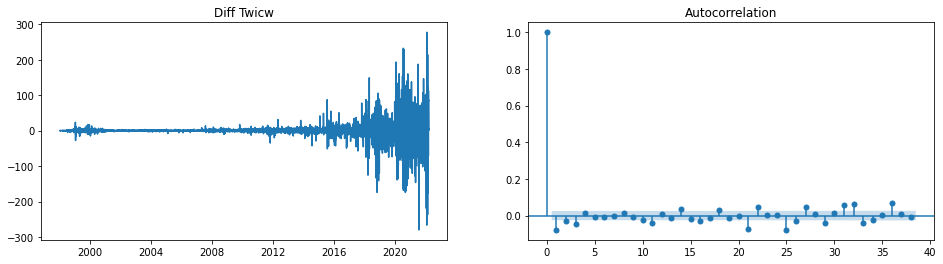

In [36]:
diff = df_am.Open.diff().dropna()
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,4))

ax1.plot(diff)
ax1.set_title("Diff Twicw")
plot_acf(diff, ax= ax2)


# Spliting Data for Feed Model

In [90]:
split_data = int(len(df_am)*0.9)


In [91]:
split_data

5489

In [95]:
train = list(df_am[0:split_data]['Open'])
test = list(df_am[split_data:]['Open'])

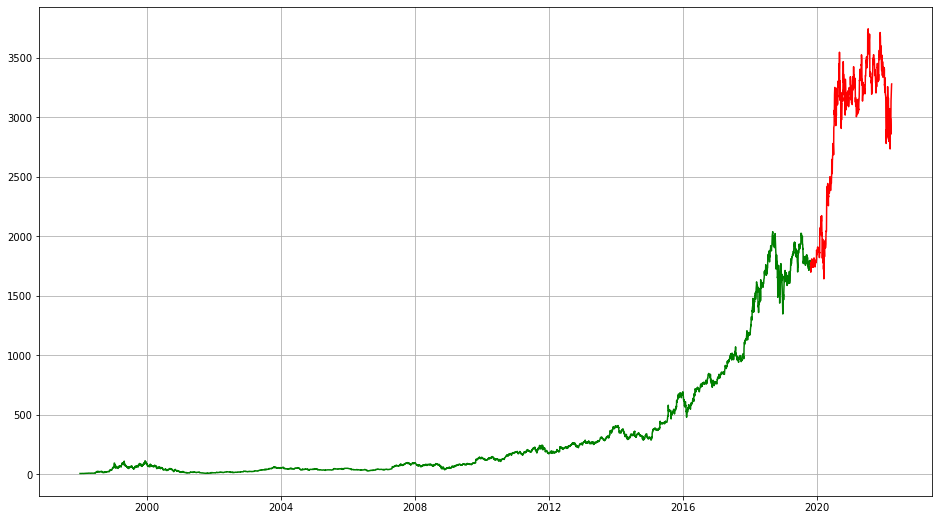

In [100]:

plt.figure(figsize=(16,9))
plt.grid(True)
plt.plot(df_am[0:split_data]['Open'],'green')
plt.plot(df_am[split_data:]['Open'],'red')


# Fitting Data into ARIMA model

In [109]:
model_pred = []
n_test_obser = len(test)

In [110]:
for i in range(n_test_obser):
    model = ARIMA(train, order=(4,1,0))
    model_fit = model.fit()
    op = model_fit.forecast()
    pred = list(op[0])[0]
    model_pred.append(pred)
    actual = test[i]
    train.append(actual)
    
    

In [111]:
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                 8538
Model:                 ARIMA(4, 1, 0)   Log Likelihood              -45656.534
Method:                       css-mle   S.D. of innovations             50.831
Date:                Wed, 20 Apr 2022   AIC                          91325.068
Time:                        11:32:16   BIC                          91367.382
Sample:                             1   HQIC                         91339.505
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3830      0.500      0.766      0.443      -0.597       1.363
ar.L1.D.y     -0.0258      0.011     -2.380      0.017      -0.047      -0.005
ar.L2.D.y     -0.0377      0.011     -3.488      0.0

# Prediction Graph. 
  * Blue line is the prediction line.
  * Red line is actual.

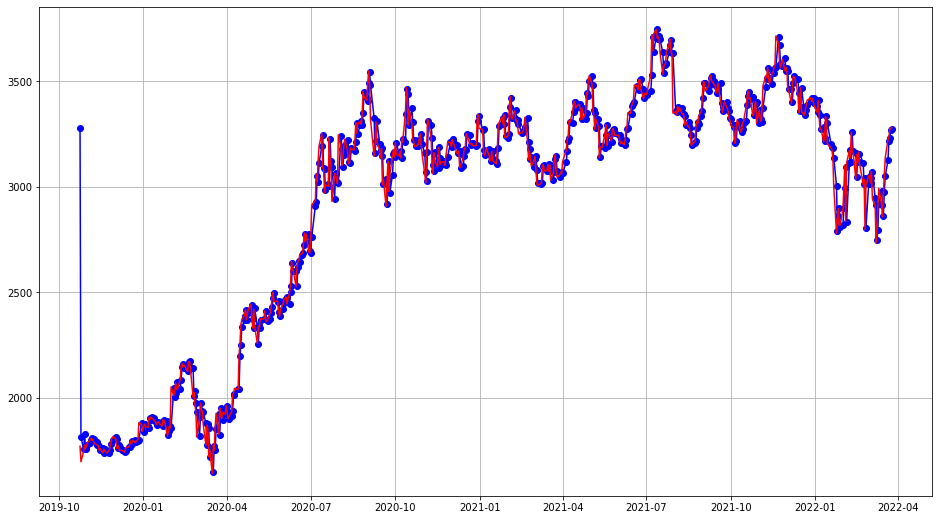

In [124]:
plt.figure(figsize=(16,9))
plt.grid(True)
date_range = df[split_data:].index
plt.plot(date_range,model_pred,color='blue',marker= 'o')
plt.plot(date_range,test,color= 'red')


In [126]:
mape =np.mean(np.abs(np.array(model_pred) - np.array(test))/np.abs(test))
print("accuracy of model is:", 100 - (mape*100))

accuracy of model is: 98.28077904547588
